In [ ]:
#instalamos funpymodeling
%pip install funpymodeling

In [2]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


In [ ]:
#importamos el archivo desde la computadora
from google.colab import files
files.upload()

In [ ]:
#convertimos el archivo en un dataframe
data1 = pd.read_csv("lastmile_delivery_operations_mit_lift_lab.csv")
data1

In [5]:
#comprobamos informacion del dataframe y el tipo de valor de cada columna
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     182 non-null    object 
 1   _title                                         176 non-null    object 
 2   _server_updated_at                             182 non-null    object 
 3   _updated_by                                    182 non-null    object 
 4   _geometry                                      182 non-null    object 
 5   _latitude                                      182 non-null    float64
 6   _longitude                                     182 non-null    float64
 7   arrival_of_the_freight_vehicle                 182 non-null    object 
 8   plates                                         181 non-null    object 
 9   company_if_visible                             109 non

In [6]:
#Comprobamos los valores nulos y comprobamos que tipo de dato es cada columna que tiene valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos



_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

In [7]:
#se crea una copia del dataframe en la cual eliminaremos los valores nulos de las columnas tipo objetc y por lo tanto ser solo texto
#se ha decidido sustituir por el mensaje de VACIO
data=data1.copy()
data["_title"] =data["_title"].fillna("VACIO")
data["plates"] =data["plates"].fillna("VACIO")
data["company_if_visible"] =data["company_if_visible"].fillna("VACIO")

In [ ]:
#Comprobamos los valores nulos despues de la sustitucion de las columnas objeto
valores_nulos=data.isnull().sum()
valores_nulos

In [12]:
#Separamos el dataframe en dos filtros, uno con variables cualitativas y otro con valores cuantitativos
#se decio no agregar la columna 25 vacio ya que no tiene ningun dato que no sea nulo 
filtroO=data.iloc[ : , [0,1,2,3,4,7,8,9,10,11,13,14,15,16,17,18,19,20,23,24,26,27]]
filtronum=data.iloc[ : , [12,21,22,28]]  
filtroX=data.iloc[ : , [5,6]]  

In [ ]:
#limpiamos valores nulos del filtro de cuantitativos
filtroN=filtronum.copy()
filtroN=filtroN.fillna(round(filtronum.mean(),1))
filtroN

<Figure size 1080x576 with 0 Axes>

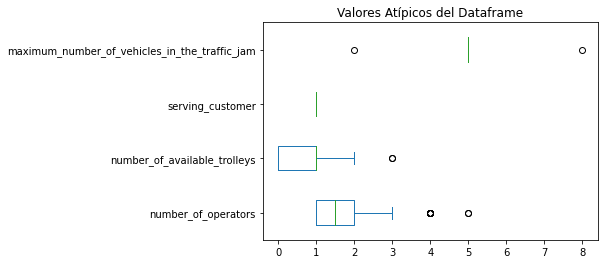

In [14]:
#Creamos una grafica para ver los valores atipicos del data frame
fig = plt.figure(figsize =(15, 8))
filtroN.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [15]:
#Encontramos los valores extremos
y=filtroN

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_operators                              3.5
number_of_available_trolleys                     2.5
serving_customer                                 1.0
maximum_number_of_vehicles_in_the_traffic_jam    5.0
dtype: float64
Limite inferior permitido number_of_operators                             -0.5
number_of_available_trolleys                    -1.5
serving_customer                                 1.0
maximum_number_of_vehicles_in_the_traffic_jam    5.0
dtype: float64


In [16]:
#Convertimos los outliers en valores nulos
outliers_iqr= filtroN[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

,number_of_operators,number_of_available_trolleys,serving_customer,maximum_number_of_vehicles_in_the_traffic_jam
0,1.0,1.0,1.0,5.0
1,2.0,1.0,1.0,5.0
2,1.0,0.0,1.0,5.0
3,1.0,2.0,1.0,5.0
4,2.0,2.0,1.0,5.0
...,...,...,...,...
177,1.0,0.0,1.0,5.0
178,1.0,0.0,1.0,5.0
179,1.0,1.0,1.0,5.0
180,2.0,0.0,1.0,5.0


In [17]:
#Comprobamos los valores nulos
valores_nulos=outliers_iqr.isnull().sum()
valores_nulos


number_of_operators                              10
number_of_available_trolleys                      2
serving_customer                                  0
maximum_number_of_vehicles_in_the_traffic_jam     2
dtype: int64

In [ ]:
#Remplazamos los valores nulos por la media
Valores_finales=outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

In [19]:
#Comprobamos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

number_of_operators                              0
number_of_available_trolleys                     0
serving_customer                                 0
maximum_number_of_vehicles_in_the_traffic_jam    0
dtype: int64

In [ ]:
#Concatenamos
lastmile_delivery_operations_mit_lift_lab_limpios = pd.concat([filtroX,filtroO,Valores_finales], axis=1)
lastmile_delivery_operations_mit_lift_lab_limpios

In [23]:
#Convertimos a CSV y descargamos
lastmile_delivery_operations_mit_lift_lab_limpios.to_csv("lastmile_delivery_operations_mit_lift_lab_limpios.csv")

In [24]:
from google.colab import files
files.download("lastmile_delivery_operations_mit_lift_lab_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>